# PROJECT

Siyanda Mvunyiswa
4009043

##Import all relevant libraries here

In [28]:
#0. import all necessary libraries
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.cluster import hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix

## Import dataset


The dataset has been uploaded to Google drive and the link is


In [6]:
#1. import google drive into colab
from google.colab import drive

#2. mount the drive
drive.mount('/content/drive')

#3. read the dataset (in CSV format) into a python dataframe using pandas
df = pd.read_csv('/content/drive/MyDrive/CSC311_2022/dataset/seeds_dataset.csv')

#4. preview the data
df.head(10)

Mounted at /content/drive


,Area,Perimeter,Compactness,Length,Width,Asymmetry,kernel_len,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533,1


## Separate X and Y
## let Y be the label and X all other columns

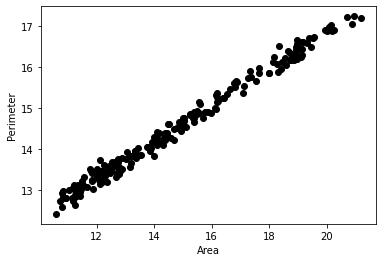

In [7]:
X = df.loc[:, df.columns != "class"]
Y = df.loc[:, df.columns == "class"]

Y = Y.replace([1, 2, 3], [0, 1, 2])
#plot Area vs Perimeter 
plt.scatter(X.iloc[:,0], X.iloc[:,1], c='black')
plt.xlabel("Area")
plt.ylabel("Perimeter")
plt.show()


## KMeans

Text(0, 0.5, 'Inertia')

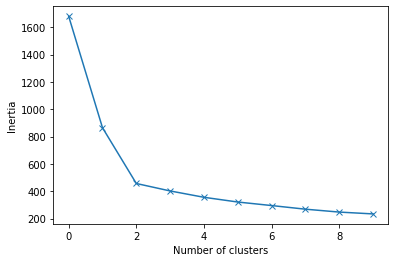

In [8]:
#scale your data
scaler = scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#plot an Elbow graph using 10 iterations
#plot Inertia vs number of clusters 

temp = []
for c in range(1, 11):
  km = KMeans(n_clusters = c, init = 'k-means++')
  km.fit(df_scaled)
  temp.append(km.inertia_)

plt.plot(range(len(temp)), temp, marker = 'x')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

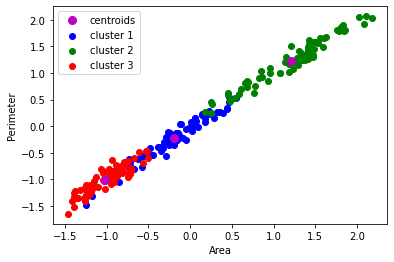

In [9]:
#cluster the dataset using k = 3
km = KMeans(n_clusters = 3)
labels = km.fit_predict(df_scaled)
centroids = km.cluster_centers_

cluster1 = df_scaled[labels == 0]
cluster2 = df_scaled[labels == 1]
cluster3 = df_scaled[labels == 2]


#plot the results of Area and Perimeter
#show the 3 clusters and their centroids
plt.scatter(cluster1[:,0], cluster1[:,1], color =  'blue', label = 'cluster 1')
plt.scatter(cluster2[:,0], cluster2[:,1], color =  'green', label = 'cluster 2')
plt.scatter(cluster3[:,0], cluster3[:,1], color =  'red', label = 'cluster 3')
plt.plot(centroids[:,0], centroids[:,1], 'mo', markersize=8, label = 'centroids')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()

plt.show()

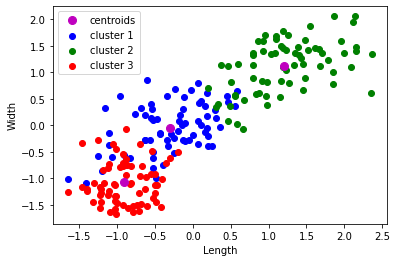

In [10]:
#plot the results of Length and Width 
#show the 3 clusters and their centroids
plt.scatter(cluster1[:,3], cluster1[:,4], color =  'blue', label = 'cluster 1')
plt.scatter(cluster2[:,3], cluster2[:,4], color =  'green', label = 'cluster 2')
plt.scatter(cluster3[:,3], cluster3[:,4], color =  'red', label = 'cluster 3')
plt.plot(centroids[:,3], centroids[:,4], 'mo', markersize=8, label = 'centroids')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()

plt.show()

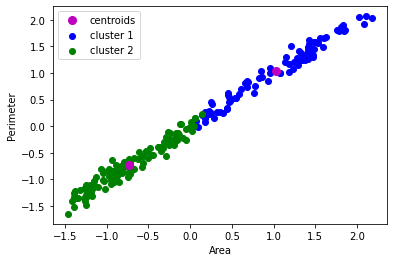

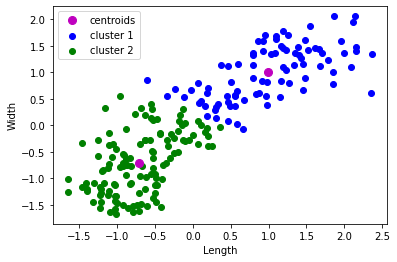

In [11]:
#Now lets cluster the dataset using the number of k you select from the Elbow method above
km = KMeans(n_clusters = 2)
labels = km.fit_predict(df_scaled)
centroids = km.cluster_centers_

cluster1 = df_scaled[labels == 0]
cluster2 = df_scaled[labels == 1]

#plot the results of Area and Perimeter 
#show the 2 clusters and their centroids
plt.scatter(cluster1[:,0], cluster1[:,1], color =  'blue', label = 'cluster 1')
plt.scatter(cluster2[:,0], cluster2[:,1], color =  'green', label = 'cluster 2')
plt.plot(centroids[:,0], centroids[:,1], 'mo', markersize=8, label = 'centroids')
plt.xlabel('Area')
plt.ylabel('Perimeter')
plt.legend()
plt.show()

##plot the results of Length and Width 
#show the 2 clusters and their centroids
plt.scatter(cluster1[:,3], cluster1[:,4], color =  'blue', label = 'cluster 1')
plt.scatter(cluster2[:,3], cluster2[:,4], color =  'green', label = 'cluster 2')
plt.plot(centroids[:,3], centroids[:,4], 'mo', markersize=8, label = 'centroids')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()


### Calculate Accuracies of KMeans

In [23]:
#compare accucies of both clustering i.e. k = 3 vs k = your choice
km = KMeans(n_clusters = 3)
labels1 = km.fit_predict(X)
KM3acc = (accuracy_score(Y,labels1) * 100)
print("Accuracy Score of (k = 3) = ", KM3acc)

km = KMeans(n_clusters = 2)
labels2 = km.fit_predict(X)
KM2acc = (accuracy_score(Y,labels2) * 100)
print("Accuracy Score of (k = 2) = ", KM2acc)

Accuracy Score of (k = 3) =  33.80952380952381
Accuracy Score of (k = 2) =  7.6190476190476195


##AHC

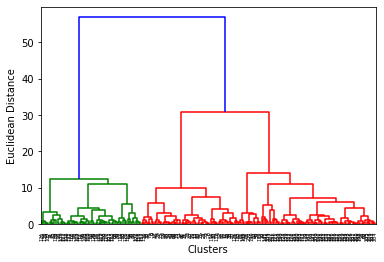

In [13]:
#Plot Dendrogram to determin the number of clusters
sch.dendrogram(sch.linkage(X,method="ward"))
plt.xlabel("Clusters")
plt.ylabel("Euclidean Distance")
plt.show()

In [14]:
#Perform AHC clustering with number of clusters found in the dendrogram
scaler = StandardScaler()

ahc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y = ahc.fit_predict(X)

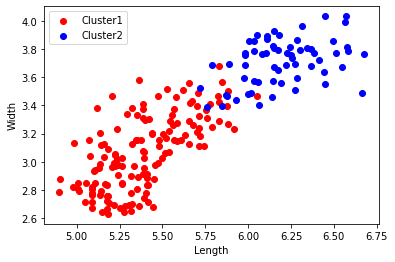

In [15]:
#plot scatter plots from B2, for Lenght and width, including cluster centroids
X = np.array(X)
plt.scatter(X[y == 0, 3], X[y==0, 4], c = 'red', label = 'Cluster1')
plt.scatter(X[y == 1, 3], X[y==1, 4], c = 'blue', label = 'Cluster2')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

In [21]:
#check accuracy
AHCacc = accuracy_score(Y,y)*100
print("Accuracy Score = " , AHCacc)

Accuracy Score =  63.33333333333333


## KNN

In [17]:
#cluster the dataset using KNN and k = 3
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X, Y)

results = classifier.predict(X)


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


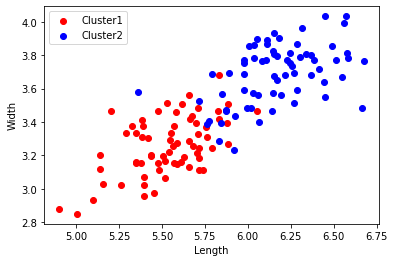

In [18]:
#Plot a scatter plot for "Lenght" and "Width" clusters
X = np.array(X)
plt.scatter(X[results == 0, 3], X[results==0, 4], c = 'red', label = 'Cluster1')
plt.scatter(X[results == 1, 3], X[results==1, 4], c = 'blue', label = 'Cluster2')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show()

In [22]:
#Results - compare prediction results with known values of Y
KNNacc = accuracy_score(Y,results)*100
print("Accuracy Score = " , KNNacc)

Accuracy Score =  96.66666666666667


In [29]:
#draw a confusion matrix of KNN
confusion_matrix(Y, results)

array([[65,  0,  5],
       [ 2, 68,  0],
       [ 0,  0, 70]])

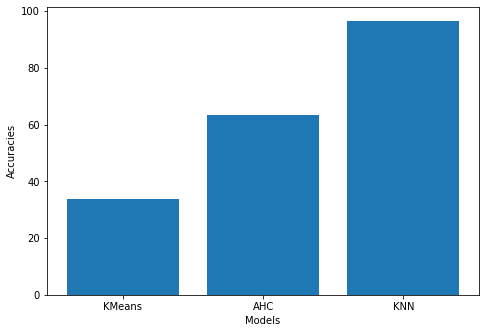

In [30]:
#Bar graph of accuracies
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
models = ['KMeans', 'AHC', 'KNN']
accuracies = [KM3acc, AHCacc, KNNacc]
ax.bar(models, accuracies)
plt.xlabel('Models')
plt.ylabel('Accuracies')
plt.show()